# Task 1 Data Analysis Pipeline
This part calls the data pipeline function 'load_and_process' to prepare the dataset of Kickstarter projects for analysis

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os
import datetime

# For how to import the scripts folder so that it can be used:
# https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.append('../scripts')

import project_functions
# relative import did not work for some reason
#from .. import project_functions

pathToData = '../../data/raw/ks-projects-201801.csv'

df = project_functions.load_and_process(pathToData)

print(df[['main_category','stateInt','durationInt']].head(10))

  main_category  stateInt  durationInt
0    Publishing         0           58
1  Film & Video         0           59
2  Film & Video         0           44
3         Music         0           29
4  Film & Video         2           55
5          Food         1           34
6          Food         1           19
7          Food         0           44
8        Design         2           34
9  Film & Video         2           29


---
# Explanatory Data Analysis

The info function gives information on all the columns and there associated types. The result shows that the 'load_and_process' function of the data pipeline has worked correctly as the new **'stateInt'** (int64), **'duration'** (timedelta64)\[ns\], and **'durationInt'** (int 64) columns have been created with the correct types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Name              1000 non-null   object         
 1   category          1000 non-null   object         
 2   main_category     1000 non-null   object         
 3   currency          1000 non-null   object         
 4   deadline          1000 non-null   object         
 5   launched          1000 non-null   object         
 6   pledged           1000 non-null   float64        
 7   state             1000 non-null   object         
 8   backers           1000 non-null   int64          
 9   country           1000 non-null   object         
 10  usd_pledged_real  1000 non-null   float64        
 11  usd_goal_real     1000 non-null   float64        
 12  stateInt          1000 non-null   int64          
 13  duration          1000 non-null   timedelta64[ns]
 14  percentFu

This function shows the number of unique values for each column.

In [4]:
print(df.nunique(axis=0))

ID                  20
Name                20
category            17
main_category        8
currency             3
deadline            20
launched            20
pledged             17
state                3
backers             15
country              3
usd_pledged_real    17
usd_goal_real       18
stateInt             3
duration            20
percentFunded       17
dtype: int64


In [5]:
print(df.describe())

                 ID       pledged     backers  usd_pledged_real  \
count  2.000000e+01     20.000000   20.000000         20.000000   
mean   8.650327e+08   9159.278500   68.450000      10543.395000   
std    3.297248e+08  23187.913671  170.990143      28700.604989   
min    1.000042e+08      0.000000    0.000000          0.000000   
25%    1.000004e+09    165.250000    2.500000        165.250000   
50%    1.000027e+09    726.500000   15.500000        726.500000   
75%    1.000059e+09   3375.892500   40.750000       3375.892500   
max    1.000072e+09  94175.000000  761.000000     121857.330000   

       usd_goal_real   stateInt                    duration  percentFunded  
count      20.000000  20.000000                          20      20.000000  
mean    30283.003500   0.550000     35 days 01:23:08.950000     122.916023  
std     50387.371853   0.759155  12 days 07:19:59.766234008     416.427506  
min       250.000000   0.000000            14 days 09:48:28       0.000000  
25%      24

This plot shows the distribution of Kickstarter projects based on the duration of the project. Interestingly, this shows that 1 month long projects are the majority of projects composing about 47% of all projects. 2 month long and 1.5 month long projects are the next most common.

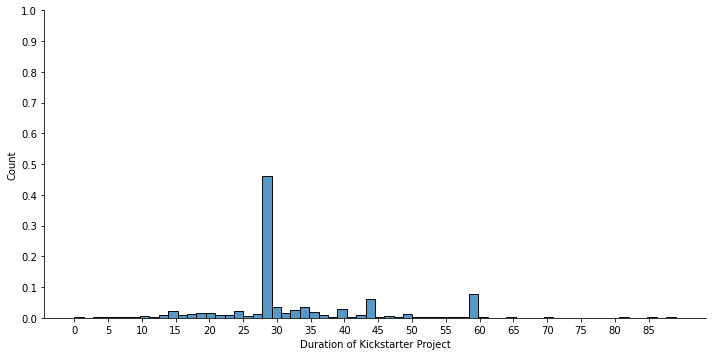

In [17]:
# Learned how to use 'stat' parameter to get bins by probability and not count from user miro from here:
# https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count
axes = sns.displot(data=df, x='durationInt', aspect=2.0, stat='probability')
axes.set_axis_labels('Duration of Kickstarter Project', 'Count')
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
axes.set(xticks=np.arange(0, 90, 5), yticks=np.arange(0,1.1,0.1))

Here is another interesting plot which shows the distribution of the different possible states of a project. Since my research question is focused on how the duration of a project affects it success, I am going to focus on projects which have the states of 'failed/canceled' or 'successful'. The other states do not provide information about the success so they will be filter out.

<AxesSubplot:xlabel='state', ylabel='count'>

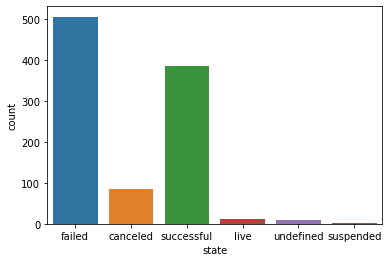

In [7]:
sns.countplot(x='state', data=df)

<AxesSubplot:>

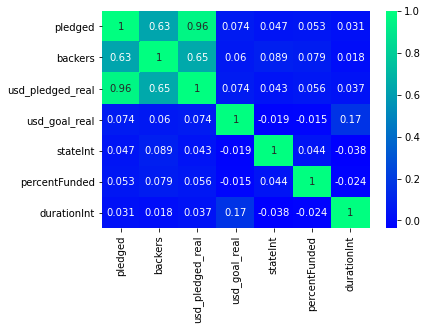

In [3]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='winter')

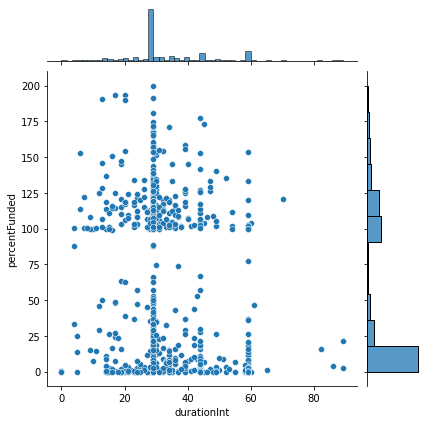

In [5]:
df2 = df[df['percentFunded'].between(0, 200)]

sns.jointplot(data=df2, x='durationInt', y='percentFunded')

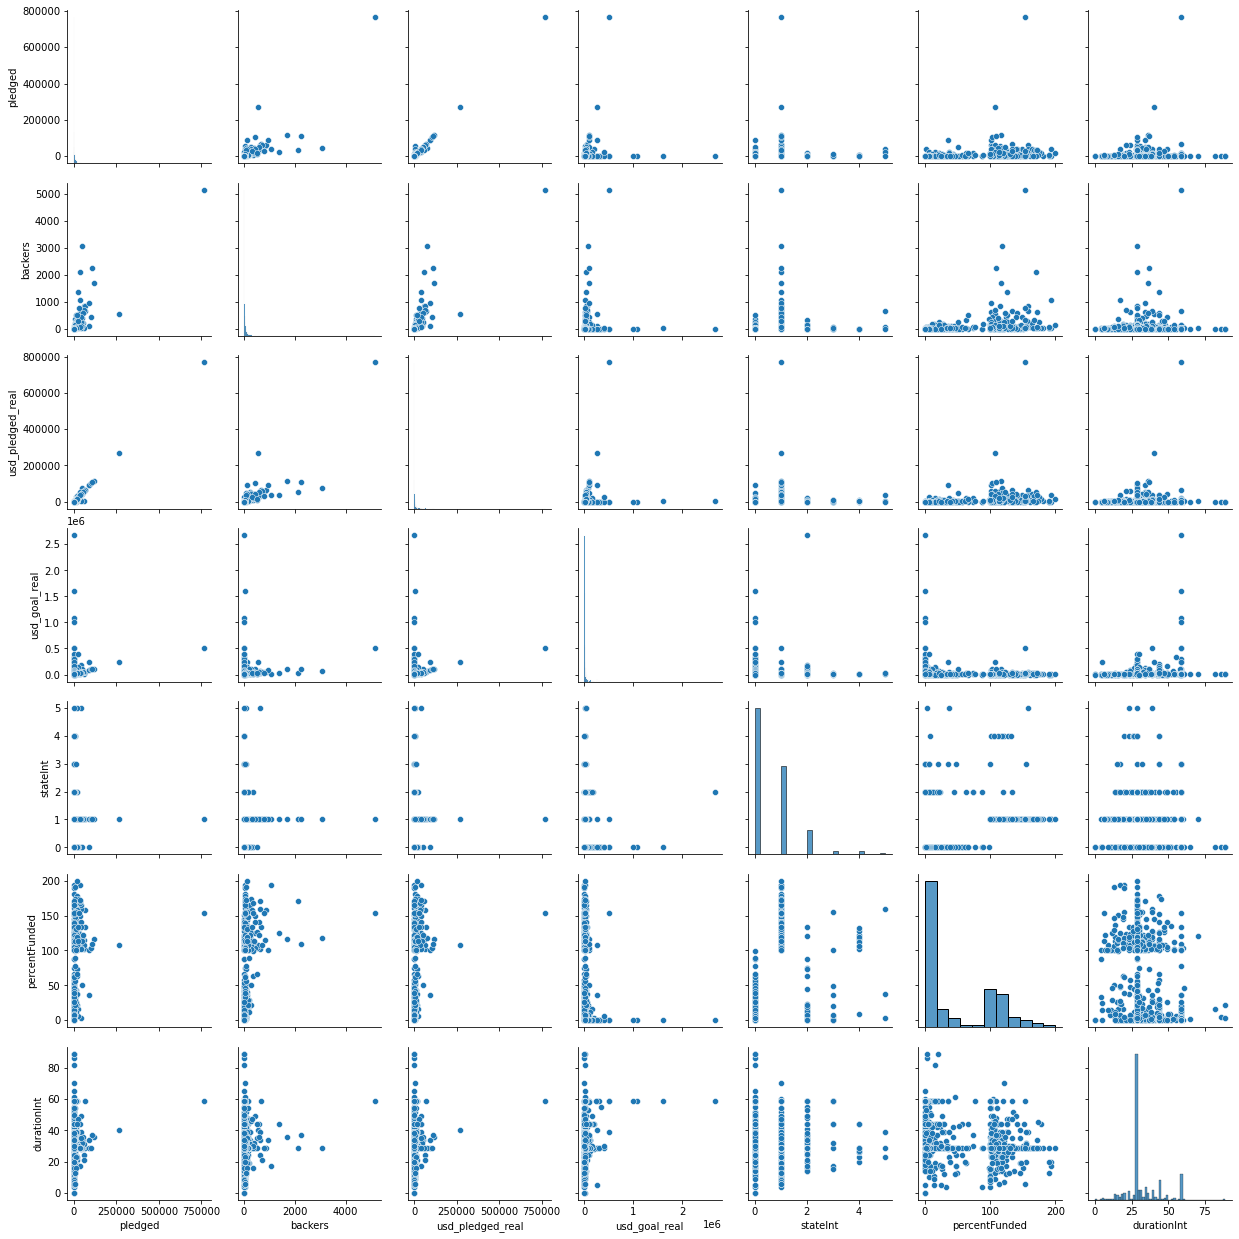

In [6]:
sns.pairplot(df2)